# Методы МСМС

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Алгоритм Metropolis sampling:

In [11]:
def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [0]
    for i in range(niter):
        ind = np.random.choice(8,2)
        proposed = proposal(current, ind, **kwargs)
        p = value(current, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[ind[0]][ind[1]] = 0;
        post.append(round(np.sum(current)))
    return post[nburn:], current

Metropolis sampler, подготовка необходимых функций:

In [7]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

In [12]:
def proposal(current, index, size=8, **kwargs):
    _ = kwargs
    ind = np.random.choice(size, 2)
    t = 0
    if ind[0] != 0:
        t += current[ind[0] - 1][ind[1]]
    if ind[0]!=size - 1:
        t += current[ind[0] + 1][ind[1]]
    if ind[1]!=0:
        t += current[ind[0]][ind[1] - 1]
    if ind[1] != size - 1:
        t += current[ind[0]][ind[1] + 1]
    
    if t == 0:
        current[ind[0]][ind[1]] = 1
    else:
        current[ind[0]][ind[1]] = 0
    return current

Теперь вычислим матожидание, то есть оценим среднее количество закрашенных вершин в графе. 

In [15]:
post, graph = metropolis(np.zeros((8, 8)), value, proposal, 20000)
print("Оценка среднего количества закрашенных вершин в графе 8x8: ", np.sum(post)/len(post))

Оценка среднего количества закрашенных вершин в графе 8x8:  15.172041397930103


Изобразим раскраску для одного из случайных графов, взятых из стационарного распределения.

Для этого напишем функцию:

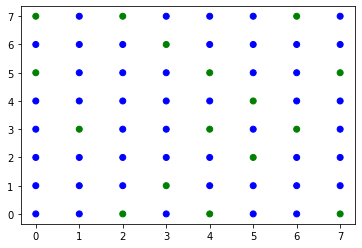

In [29]:
def Draw(arr):
    if arr.dtype != 'bool':
        raise ValueError('Массив arr должен быть bool')
    else:
        colors = np.empty(arr.shape, dtype = 'U1')
        colors[:] = 'black'
        colors[arr] = 'green'
        x, y = np.indices((arr.shape))
        plt.scatter(x, y, c = colors.ravel())
    

Draw(graph.astype('bool'))

Проверка стационарности:

Text(0.5, 1.0, 'Количество закрашенных вершин графа')

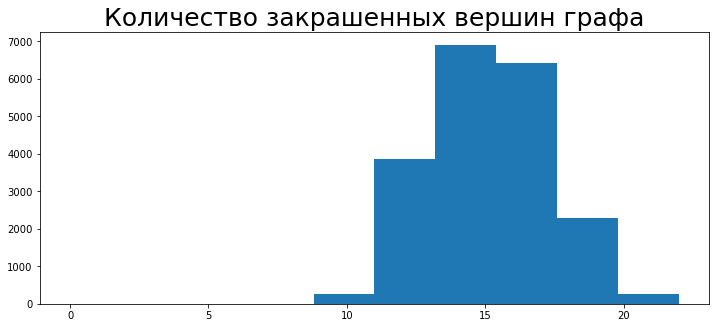

In [35]:
plt.figure(figsize = (12, 5))
plt.hist(post)
plt.title("Количество закрашенных вершин графа", size = 25)

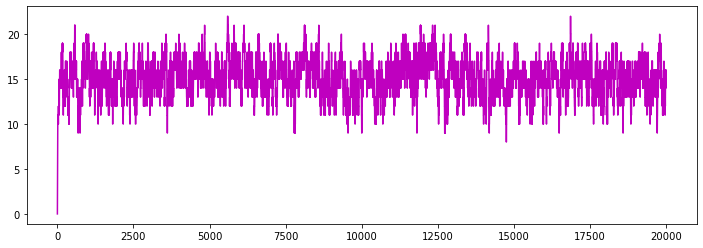

In [44]:
plt.figure(figsize = (12,4))
plt.plot(post, color = 'm')

То есть гипотеза стационарности не отвергается. 